Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset to the python environment.

In [2]:
data = pd.read_excel(r'D:\Devi\ICT_TVM\CASE STUDY\iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Data analysis

In [5]:
data.shape

(150, 5)

In [6]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
data.info

<bound method DataFrame.info of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

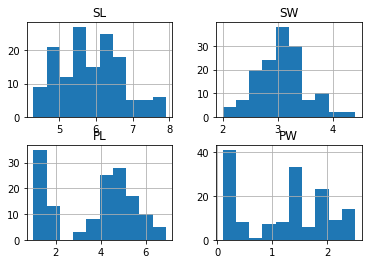

In [8]:
data.hist()


In [9]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

The data contain missing values in Sepel length and Sepel width

since Sepel length is likely to be right skewed distribution and sepel width is noemally distributed, we can fill the missing values with mean value

## Do necessary pre-processing steps.

In [10]:
sepell_mean = data['SL'].mean()

In [11]:
sepelw_mean = data['SW'].mean()

In [12]:
petel_mean = data['PL'].mean()

In [13]:
data['SL']=data['SL'].fillna(sepell_mean)

In [14]:
data['SW']=data['SL'].fillna(sepelw_mean)

In [15]:
data['PL']=data['SL'].fillna(petel_mean)

In [16]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

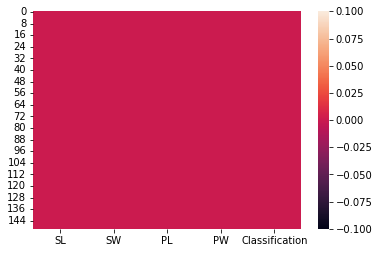

In [17]:
sns.heatmap(data.isna())

successfully filled all the missing data

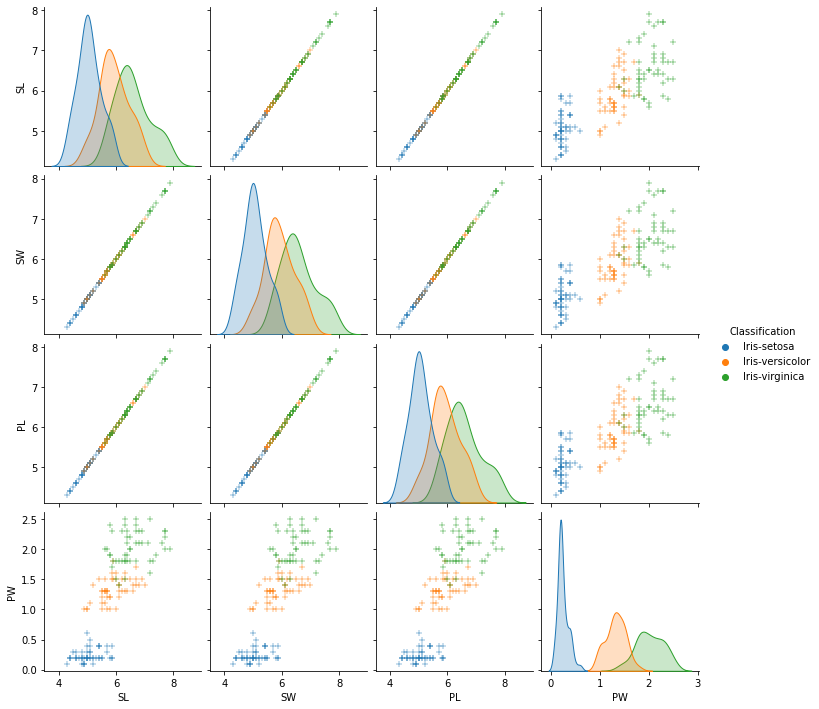

In [18]:
sns.pairplot(data, hue='Classification', markers='+')


from the plot it is clear that sepel length sepel width and petel length are linearly related

In [19]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,5.855944,5.855944,1.198667
std,0.808480,0.808480,0.808480,0.763161
min,4.300000,4.300000,4.300000,0.100000
25%,5.200000,5.200000,5.200000,0.300000
50%,5.800000,5.800000,5.800000,1.300000
75%,6.400000,6.400000,6.400000,1.800000
max,7.900000,7.900000,7.900000,2.500000


In [52]:
# Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
species = data['Classification']
data['Classification'] =label.fit_transform(species)

In [21]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,5.100000,5.100000,0.2,0
1,4.900000,4.900000,4.900000,0.2,0
2,5.855944,5.855944,5.855944,0.2,0
3,4.600000,4.600000,4.600000,0.2,0
4,5.000000,5.000000,5.000000,0.2,0


In [22]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,6.7,6.7,2.3,2
146,6.3,6.3,6.3,1.9,2
147,6.5,6.5,6.5,2.0,2
148,6.2,6.2,6.2,2.3,2
149,5.9,5.9,5.9,1.8,2


<AxesSubplot:>

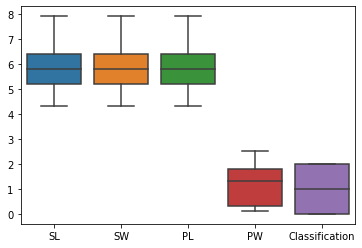

In [23]:
# checking for outliers
sns.boxplot(data=data)

There is no outliers in this dataset

## Model Building

In [69]:
# Splitting the data

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
X= data.drop(['Classification'], axis=1)
Y=data['Classification']

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=45,test_size=.2)

### 1.Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score

logit =LogisticRegression()
logit.fit(X_train,Y_train)
Y_pred = logit.predict(X_test)

In [80]:
print("Accuracy is", accuracy_score(Y_test,Y_pred))
print("Precision is", precision_score(Y_test,Y_pred,pos_label='positive', average='micro'))
print("Recall is", recall_score(Y_test,Y_pred,pos_label='positive', average='micro'))
print("Fl score is", f1_score(Y_test,Y_pred,pos_label='positive', average='micro'))

Accuracy is 0.9666666666666667
Precision is 0.9666666666666667
Recall is 0.9666666666666667
Fl score is 0.9666666666666667


In [84]:
confusion_matrix(Y_test,Y_pred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 11]], dtype=int64)

In [50]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [51]:
logit =LogisticRegression()
logit.fit(X_train,Y_train)
Y_pred = logit.predict(X_test)

In [52]:
print("Accuracy is", accuracy_score(Y_test,Y_pred))
print("Precision is", precision_score(Y_test,Y_pred,pos_label='positive', average='micro'))
print("Recall is", recall_score(Y_test,Y_pred,pos_label='positive', average='micro'))
print("Fl score is", f1_score(Y_test,Y_pred,pos_label='positive', average='micro'))

Accuracy is 0.9666666666666667
Precision is 0.9666666666666667
Recall is 0.9666666666666667
Fl score is 0.9666666666666667


There is no difference in accuracy precision recall and f1 score between scaled data 

### 2.kNN Model

In [88]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbours = np.arange(3,15)
for k in neighbours:
    classifier = KNeighborsClassifier(n_neighbors=k, metric ='minkowski' )
    classifier.fit(X_train,Y_train) 
    y_pred= classifier.predict(X_test)
    acc= accuracy_score(Y_test,y_pred)
    acc_values.append(acc)

Text(0.5, 0, 'Neighbours')

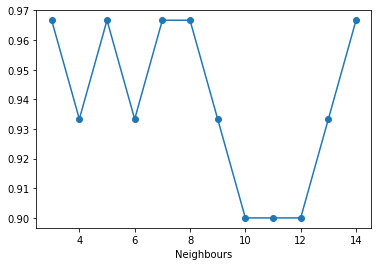

In [89]:
plt.plot(neighbours,acc_values,'o-')
plt.xlabel("Neighbours")

In [90]:
acc_values

[0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9333333333333333,
 0.9666666666666667]

In [98]:
# setting K=8 from the plot
classifier = KNeighborsClassifier(n_neighbors=8, metric ='minkowski' )
classifier.fit(X_train,Y_train) 
y_pred= classifier.predict(X_test)


In [99]:
print("Accuracy is", accuracy_score(Y_test,y_pred))
print("Precision is", precision_score(Y_test,y_pred,pos_label='positive', average='micro'))
print("Recall is", recall_score(Y_test,y_pred,pos_label='positive', average='micro'))
print("Fl score is", f1_score(Y_test,y_pred,pos_label='positive', average='micro'))

Accuracy is 0.9666666666666667
Precision is 0.9666666666666667
Recall is 0.9666666666666667
Fl score is 0.9666666666666667


We got same precision and accuracy values from kNN model as well

In [100]:
confusion_matrix(Y_test,y_pred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 11]], dtype=int64)

### 3.Decision tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
y_pred = dt_model.predict(X_test)

In [102]:
print("Accuracy is", accuracy_score(Y_test,y_pred))
print("Precision is", precision_score(Y_test,y_pred,pos_label='positive', average='micro'))
print("Recall is", recall_score(Y_test,y_pred,pos_label='positive', average='micro'))
print("Fl score is", f1_score(Y_test,y_pred,pos_label='positive', average='micro'))

Accuracy is 0.9333333333333333
Precision is 0.9333333333333333
Recall is 0.9333333333333333
Fl score is 0.9333333333333333


In [103]:
confusion_matrix(Y_test,y_pred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  2, 10]], dtype=int64)

Decision tree algorithm gives less precision accuracy values than the other two models

### 4.SVM

In [104]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train,Y_train)

SVC(kernel='linear')

In [114]:
y_pred1 = svm_linear.predict(X_test)

In [115]:
print("Accuracy is", accuracy_score(Y_test,y_pred1))
print("Precision is", precision_score(Y_test,y_pred1,pos_label='positive', average='micro'))
print("Recall is", recall_score(Y_test,y_pred1,pos_label='positive', average='micro'))
print("Fl score is", f1_score(Y_test,y_pred1,pos_label='positive', average='micro'))

Accuracy is 0.9333333333333333
Precision is 0.9333333333333333
Recall is 0.9333333333333333
Fl score is 0.9333333333333333


In [113]:
confusion_matrix(Y_test,y_pred1)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  2, 10]], dtype=int64)

SVM model also algorithm gives less precision accuracy values than the Logistic regression model and kNN

### 5.Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier


rf= RandomForestClassifier()
rf.fit(X_train,Y_train)


RandomForestClassifier()

In [32]:
y_pred1 = rf.predict(X_test)

In [53]:
print("Accuracy is", accuracy_score(Y_test,y_pred1))
print("Precision is", precision_score(Y_test,y_pred1,pos_label='positive', average='micro'))
print("Recall is", recall_score(Y_test,y_pred1,pos_label='positive', average='micro'))
print("Fl score is", f1_score(Y_test,y_pred1,pos_label='positive', average='micro'))

Accuracy is 0.9333333333333333
Precision is 0.9333333333333333
Recall is 0.9333333333333333
Fl score is 0.9333333333333333


In [124]:
confusion_matrix(Y_test,y_pred1)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  2, 10]], dtype=int64)

In [ ]:
#fine tuning of hyper parameters

In [40]:
rft=RandomForestClassifier(n_estimators=200,max_depth=10,random_state=42,criterion='entropy')

In [41]:
rft.fit(X_train,Y_train)
y_pred=rft.predict(X_test)

In [43]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.9333333333333333
precision score: 0.9259259259259259
recall_score: 0.9444444444444445
f1 score: 0.9280303030303031


Getting the same accuracy level

In [44]:
# gradient boosting


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)
y_pred=gb.predict(X_test)

In [54]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.9333333333333333
precision score: 0.9259259259259259
recall_score: 0.9444444444444445
f1 score: 0.9280303030303031


We got the maximum precision and accuracy value for logistic regression and kNN model compared two the other models